Generated Timetable:
Pool 1: English A2, Python, Prob and Stats
Pool 2: Typing, English A2, Python
Pool 3: Typing, Prob and Stats, Python
Pool 4: Typing, Prob and Stats, English A2


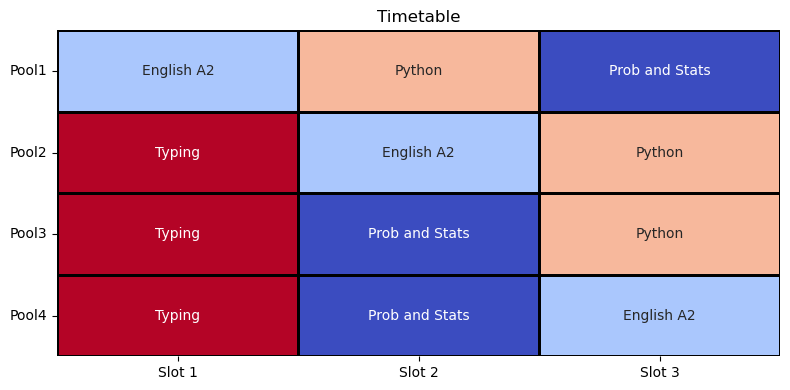

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

subjects = ['Prob and Stats', 'English A2', 'Python', 'Typing']
pools = 4
slots_per_pool = 3
subject_count = 3

assert len(subjects) * subject_count == pools * slots_per_pool

all_subjects = np.array(subjects*subject_count)

def typing_first(timetable):
    adjusted = []
    for row in timetable:
        row_list = list(row)
        if 'Typing' in row_list:
            row_list.remove('Typing')
            row_list = ['Typing'] + row_list
        adjusted.append(row_list)
    return np.array(adjusted)

timetable = create_valid_timetable()
timetable = typing_first(timetable)

print('Generated Timetable:')
for i, row in enumerate(timetable):
    print(f"Pool {i+1}: {', '.join(row)}")


subject_to_idx = {subject: i for i, subject in enumerate(subjects)}
numeric_timetable = np.vectorize(subject_to_idx.get)(timetable)

plt.figure(figsize=(8, 4))
sns.heatmap(numeric_timetable, annot=timetable, fmt='', cmap='coolwarm', cbar=False, linewidths=1, linecolor='black')
plt.title("Timetable")
# plt.xlabel('Slot')
# plt.ylabel('Pool')
plt.yticks(np.arange(pools) + 0.5,[f'Pool{i+1}' for i in range(pools)], rotation=0)
plt.xticks(np.arange(slots_per_pool) + 0.5, [f"Slot {i+1}" for i in range(slots_per_pool)], rotation=0)
plt.tight_layout()
plt.show()